<a href="https://colab.research.google.com/github/ml2-picme/PicMe/blob/master/prototyping/Using_Google_Drive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Option A) Mount Google Drive in Colab

from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

!ls "/content/drive/My Drive"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
 20161017_Workflow_DDX_v3.pptx	       'Seamless Analytics GmbH'
'Colab Notebooks'		        Versicherungen
'Exist 2019'			        WakeMeApp
'Office 365 über die Hochschule.gdoc'


In [10]:
# Option B) Opload Files from Google Drive to the local Colab Server storage (faster reads than with mounted Drive)

# Install the PyDrive wrapper & import libraries
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import os

# Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Delete the local directory
!rm -r /root/data/
print("Deleted local directory")

# Set a local directory and upload files from Google Drive
local_root_path = os.path.expanduser("~/data")
try:
  os.makedirs(local_root_path)
except: pass

def ListFolder(google_drive_id, destination):
  file_list = drive.ListFile({'q': "'%s' in parents and trashed=false" % google_drive_id}).GetList()
  counter = 0
  for f in file_list:
    # If it is a directory then, create the dicrectory and upload the file inside it
    if f['mimeType']=='application/vnd.google-apps.folder': 
      folder_path = os.path.join(destination, f['title'])
      os.makedirs(folder_path)
      print('* creating directory {}'.format(folder_path))
      ListFolder(f['id'], folder_path)
    else:
      fname = os.path.join(destination, f['title'])
      f_ = drive.CreateFile({'id': f['id']})
      f_.GetContentFile(fname)
      counter += 1
  print('* {} files were uploaded in {}'.format(counter, destination))

# Opening and uploading the Drive Folder
print("Calling the ListFolder method, that uploads the data...")
ListFolder("1NzovkmOEr0ql1NgMzl4AihIE1uc-nuH2", local_root_path)
print("Upload finished!")

# Show the Data in the local Path
print("Listing files in local test directory")
!ls /root/data/test

Deleted local directory
Calling the ListFolder method, that uploads the data...
* creating directory /root/data/test
* 2 files were uploaded in /root/data/test
* 4 files were uploaded in /root/data
Upload finished!
Listing files in local test directory
hund.jpg  light-bulb.png


In [15]:
# Option C) Upload from local Computer
from google.colab import files
uploaded = files.upload()

print("We are in Server directory:")
!pwd

print("Uploaded files:")
!ls

Saving thumbs-up.png to thumbs-up (3).png
We are in Server directory:
/content
Uploaded files:
 adc.json   sample_data		'thumbs-up (2).png'   thumbs-up.png
 drive	   'thumbs-up (1).png'	'thumbs-up (3).png'


Using TensorFlow backend.


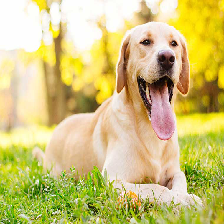

In [16]:
# Show a File
from keras.preprocessing.image import load_img, img_to_array

load_img("/root/data/test/hund.jpg", target_size=(224,224))